# GO-KART DATA
 
 In this notebook, there is an analysis of the go-kart data I went with my friends with some visualizations.

# Setup

In [99]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv("df.csv")

# Exploring and manipulating the data

In [100]:
df.head()

,race_id,kart_id,lap,lap_time,race_date,driver_id,track_id,track_size
0,5,kart3,1,36.78,07/23/2022,1,291211,375
1,5,kart3,2,33.45,07/23/2022,1,291211,375
2,5,kart3,3,33.76,07/23/2022,1,291211,375
3,5,kart3,4,34.28,07/23/2022,1,291211,375
4,5,kart3,5,36.17,07/23/2022,1,291211,375


In [101]:
df.shape

(722, 8)

In [102]:
df.describe()

,race_id,lap,lap_time,driver_id,track_id,track_size
count,722.000000,722.000000,722.000000,722.000000,722.0,722.0
mean,4.058172,12.027701,37.483504,18.890582,291211.0,375.0
std,2.216930,8.137467,4.086179,11.674287,0.0,0.0
min,1.000000,1.000000,32.280000,1.000000,291211.0,375.0
25%,2.000000,6.000000,35.315000,12.000000,291211.0,375.0
50%,4.000000,11.000000,36.735000,21.000000,291211.0,375.0
75%,6.000000,17.000000,39.257500,31.000000,291211.0,375.0
max,8.000000,32.000000,85.860000,33.000000,291211.0,375.0


In [103]:
df.dtypes

race_id         int64
kart_id        object
lap             int64
lap_time      float64
race_date      object
driver_id       int64
track_id        int64
track_size      int64
dtype: object

In [104]:
df["lap_speed"] = (df["track_size"]/df["lap_time"]) / (10/36)

In [105]:
df.head()

,race_id,kart_id,lap,lap_time,race_date,driver_id,track_id,track_size,lap_speed
0,5,kart3,1,36.78,07/23/2022,1,291211,375,36.704731
1,5,kart3,2,33.45,07/23/2022,1,291211,375,40.358744
2,5,kart3,3,33.76,07/23/2022,1,291211,375,39.988152
3,5,kart3,4,34.28,07/23/2022,1,291211,375,39.381564
4,5,kart3,5,36.17,07/23/2022,1,291211,375,37.323749


In [106]:
df.groupby(by="kart_id").max()

,race_id,lap,lap_time,race_date,driver_id,track_id,track_size,lap_speed
kart_id,,,,,,,,
kart1,5,32,75.78,09/23/2021,31,291211,375,38.189533
kart10,8,32,74.82,10/28/2022,33,291211,375,41.271782
kart11,7,32,44.99,07/23/2022,33,291211,375,39.006068
kart13,8,17,45.33,07/23/2022,31,291211,375,41.033435
kart14,7,17,37.94,07/23/2022,31,291211,375,40.286482
kart15,8,13,41.39,06/25/2023,31,291211,375,40.552719
kart2,6,32,57.29,10/28/2022,21,291211,375,40.346683
kart3,8,32,85.86,10/28/2022,33,291211,375,41.821561
kart7,3,32,48.43,09/23/2021,31,291211,375,38.287011


<AxesSubplot:title={'center':'Max Lap Speed per Kart'}, xlabel='kart_id', ylabel='lap_speed'>

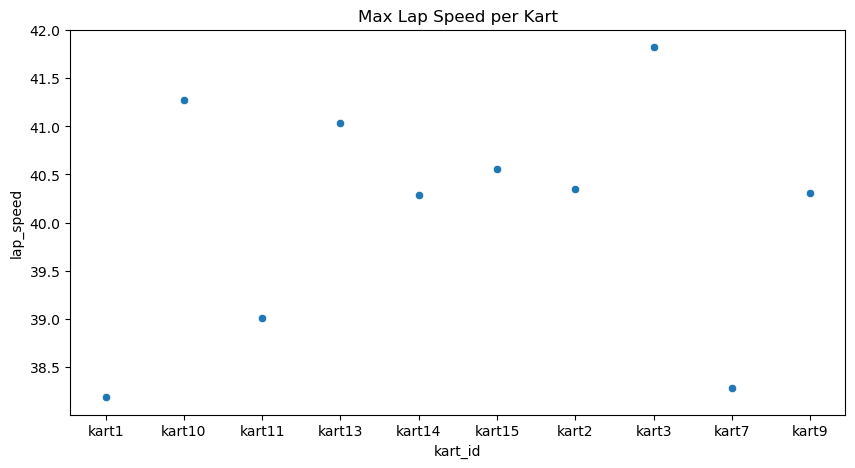

In [107]:
plt.figure(figsize=(10,5))
plt.title("Max Lap Speed per Kart")
sns.scatterplot(data=df.groupby(by="kart_id").max(), x="kart_id",y="lap_speed")

As you can see in this plot the fastest kart is kart3.

In [108]:
kart3 = df[df["kart_id"] == "kart3"]

<AxesSubplot:title={'center':"Kart3's lap times per lap"}, xlabel='lap', ylabel='lap_time'>

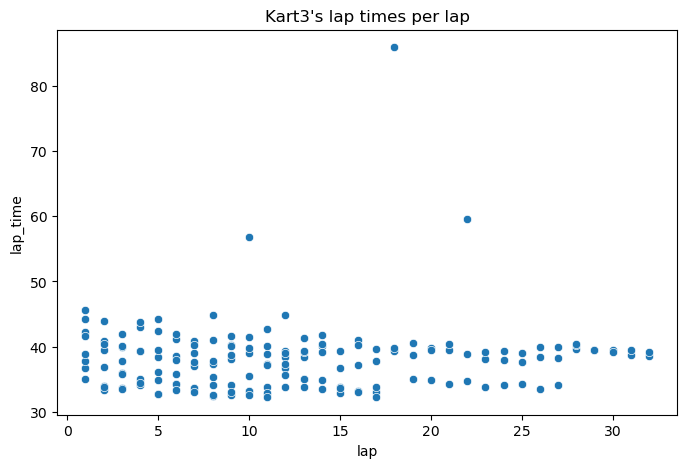

In [109]:
plt.figure(figsize=(8,5))
plt.title("Kart3's lap times per lap")
sns.scatterplot(data=df[df["kart_id"] == "kart3"], x="lap", y="lap_time")

Due to insufficent data in higher laps this plot does not give us much.

<AxesSubplot:title={'center':"Driver's lap times"}, xlabel='driver_id', ylabel='lap_time'>

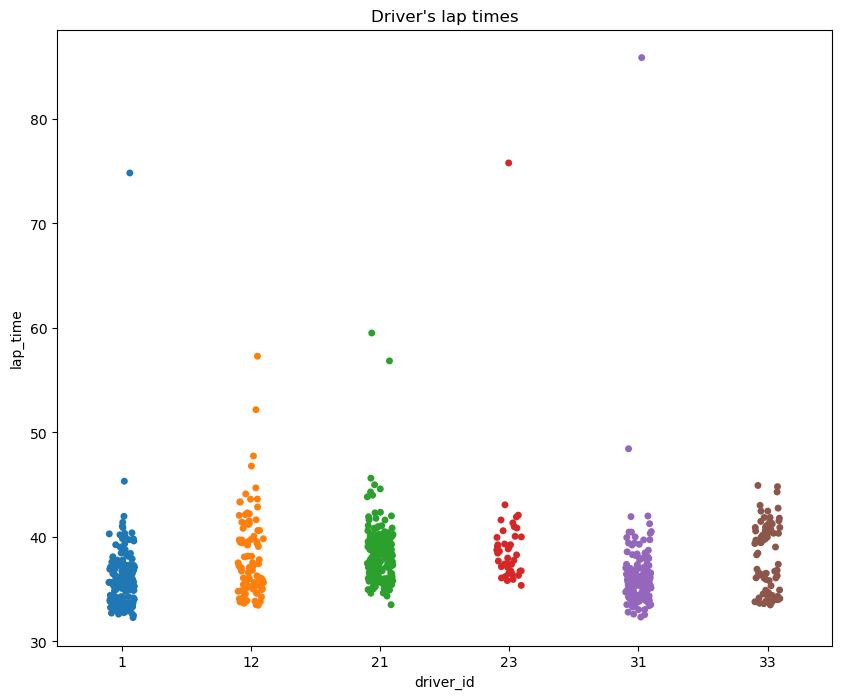

In [110]:
plt.figure(figsize=(10,8))
plt.title("Driver's lap times")
sns.stripplot(data=df, x="driver_id", y="lap_time")

As you can see from this plot and the plot before we have some outliers. This excess lap times probably as a result of an accident or a spin. We will detect and remove them later for a better view and data clearity.

Now lets take a look who is the fastest.

In [111]:
min_lap_times = df.groupby(by="driver_id").min()

In [112]:
min_lap_times.index

Int64Index([1, 12, 21, 23, 31, 33], dtype='int64', name='driver_id')

<AxesSubplot:xlabel='driver_id', ylabel='lap_time'>

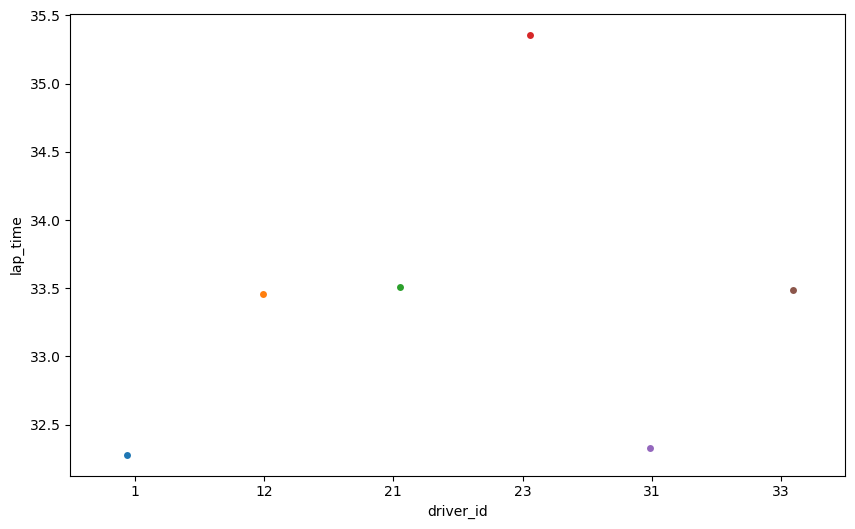

In [113]:
plt.figure(figsize=(10,6))
sns.stripplot(x=min_lap_times.index, y=min_lap_times["lap_time"])

The minumum lap times of driver 1 and driver 31 are very close to each other. For a better look lets analyze just two of them.

In [114]:
driver1 = df[df["driver_id"] == int(1)]
driver31 = df[df["driver_id"] == int(31)]

best_drivers = pd.concat([driver1,driver31])

In [115]:
best_drivers

,race_id,kart_id,lap,lap_time,race_date,driver_id,track_id,track_size,lap_speed
0,5,kart3,1,36.78,07/23/2022,1,291211,375,36.704731
1,5,kart3,2,33.45,07/23/2022,1,291211,375,40.358744
2,5,kart3,3,33.76,07/23/2022,1,291211,375,39.988152
3,5,kart3,4,34.28,07/23/2022,1,291211,375,39.381564
4,5,kart3,5,36.17,07/23/2022,1,291211,375,37.323749
...,...,...,...,...,...,...,...,...,...
661,6,kart3,24,34.11,10/28/2022,31,291211,375,39.577836
662,6,kart3,25,34.34,10/28/2022,31,291211,375,39.312755
663,6,kart3,26,33.52,10/28/2022,31,291211,375,40.274463
664,6,kart3,27,34.19,10/28/2022,31,291211,375,39.485230


<AxesSubplot:xlabel='lap', ylabel='lap_time'>

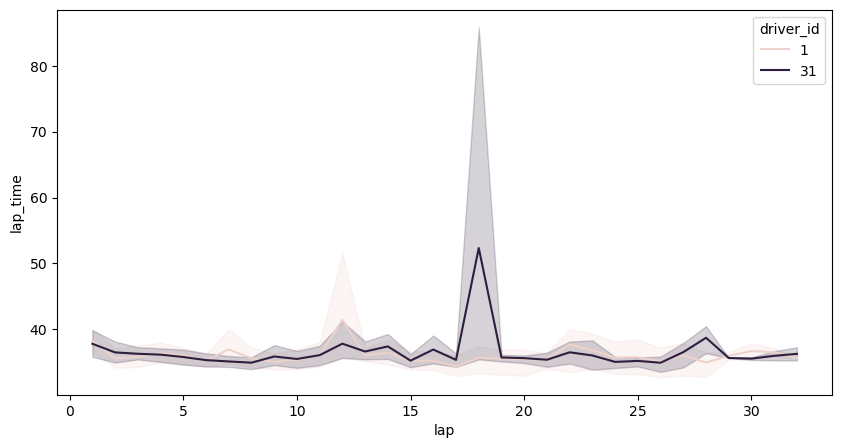

In [116]:
plt.figure(figsize=(10,5))
sns.lineplot(data=best_drivers, x="lap", y="lap_time", hue="driver_id")

As you can see here we see a big spike. Because of this spike, we cannot examine the graph in detail. Now we are gonna detect them and remove them from our data.

![Alt text](1_0MPDTLn8KoLApoFvI0P2vQ.png)

In [117]:
lap_times = df["lap_time"]

q1 = lap_times.quantile(0.25)
q3 = lap_times.quantile(0.75)

iqr = q3-q1

maximum = q3 + (1.5 * iqr)

max_idxs = df[df["lap_time"] > maximum].index

df.drop(index=max_idxs, inplace=True)

<AxesSubplot:xlabel='lap', ylabel='lap_time'>

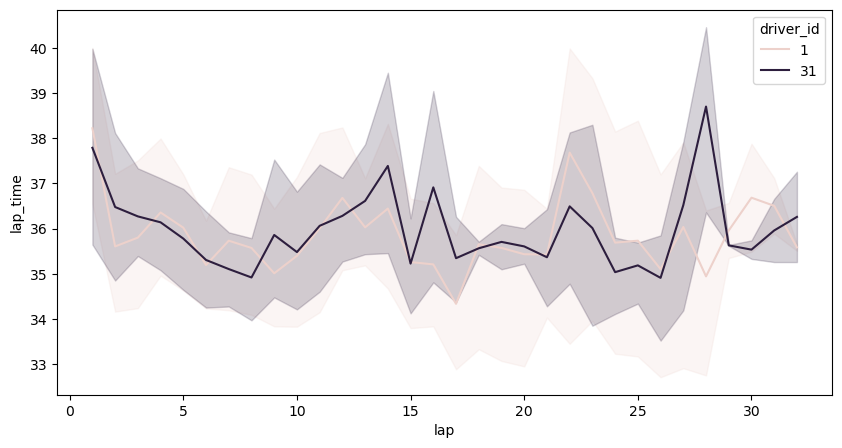

In [118]:
driver1 = df[df["driver_id"] == int(1)]
driver31 = df[df["driver_id"] == int(31)]

best_drivers = pd.concat([driver1,driver31])

plt.figure(figsize=(10,5))
sns.lineplot(data=best_drivers, x="lap", y="lap_time", hue="driver_id")

Now we can examine the graph better. 

In [119]:
mlt_best_drivers = best_drivers.groupby(by="driver_id").min()

In [120]:
mlt_best_drivers

,race_id,kart_id,lap,lap_time,race_date,track_id,track_size,lap_speed
driver_id,,,,,,,,
1,1,kart1,1,32.28,04/15/2023,291211,375,32.165833
31,1,kart1,1,32.33,04/15/2023,291211,375,32.142857


<AxesSubplot:xlabel='driver_id', ylabel='lap_time'>

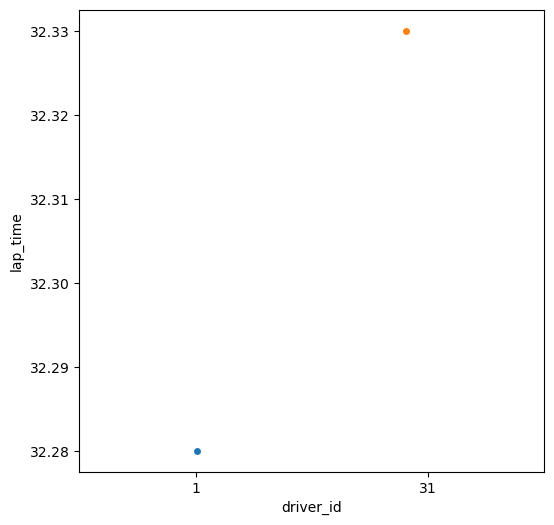

In [121]:
plt.figure(figsize=(6,6))
sns.stripplot(x=mlt_best_drivers.index, y=mlt_best_drivers["lap_time"])

And the fastest driver is driver 1. 

In [122]:
min_lti = df["lap_time"].idxmin()
min_lti

382

In [123]:
df.iloc[[min_lti]]

,race_id,kart_id,lap,lap_time,race_date,driver_id,track_id,track_size,lap_speed
387,7,kart14,5,36.01,04/15/2023,31,291211,375,37.489586


In [124]:
race_7 = df[df["race_id"] == int(7)]

<AxesSubplot:xlabel='lap', ylabel='lap_time'>

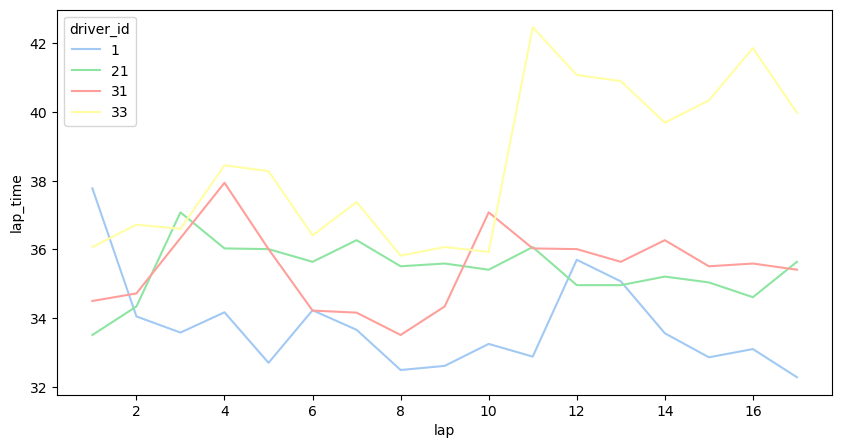

In [125]:
plt.figure(figsize=(10,5))
sns.lineplot(data=race_7, x="lap", y="lap_time", hue="driver_id", palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#fffea3'])

In [126]:
second_min_lti = df.drop([min_lti])["lap_time"].idxmin()
second_min_lti

648

In [127]:
df.iloc[[second_min_lti]]

,race_id,kart_id,lap,lap_time,race_date,driver_id,track_id,track_size,lap_speed
660,6,kart3,23,33.85,10/28/2022,31,291211,375,39.881832


In [128]:
race_6 = df[df["race_id"] == int(6)]

<AxesSubplot:xlabel='lap', ylabel='lap_time'>

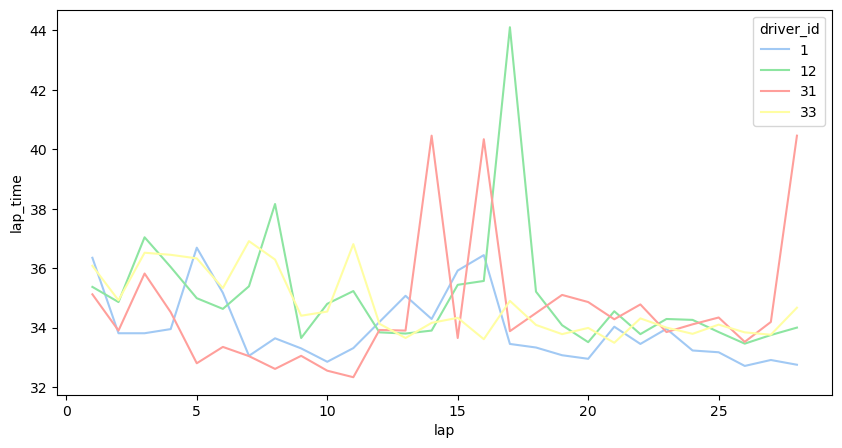

In [129]:
plt.figure(figsize=(10,5))
sns.lineplot(data=race_6, x="lap", y="lap_time", hue="driver_id", palette=['#a1c9f4', '#8de5a1', '#ff9f9b', '#fffea3'])